# Section 1: Data Cleaning

### In this section we:
- Added text labels to csv dataset
- Pruned dataset to meet needs
- Created brightness augmentations using PIL

In [7]:
import os
from PIL import Image
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# # don't run without train_images folder
# images = os.listdir()
# size_counts = defaultdict(int)
# def is_jpg(filename):
#     try:
#         i=Image.open(filename)
#         return i.format =='JPEG'
#     except IOError:
#         return False
# for i in range(len(images)-1, len(images)):
#     if not is_jpg(images[i]):
#         continue
#     im = Image.open(images[i])
#     size_counts[im.size]+=1
# size_counts = dict(size_counts)
# print(len(images), "images of size:", im.size)

## Read the csv as a dataframe and map number codes to the long label

### We declare a function that uses a manually created dictionary to the type of condition the data has

In [15]:
def numToLong(input):
    return {"0": "Cassava Bacterial Blight (CBB)", 
            "1": "Cassava Brown Streak Disease (CBSD)", 
            "2": "Cassava Green Mottle (CGM)", 
            "3": "Cassava Mosaic Disease (CMD)", 
            "4": "Healthy"}[str(input)]
np.random.seed(42)
df = pd.read_csv('./train.csv')
df['long_labels'] = df.label.map(lambda x: numToLong(x))
df.shape 

(5153, 3)

## Remove extra images from train_images folder

We want the data to be balanced between sick and not sick so we have roughly 2500 healthy images and ~500 of each disease in our final dataset for this project

removing  1087 Cassava Bacterial Blight (CBB)
removing  2189 Cassava Brown Streak Disease (CBSD)
removing  2386 Cassava Green Mottle (CGM)
removing  13158 Cassava Mosaic Disease (CMD)
1000015157.jpg does not exist
1001320321.jpg does not exist
1039658655.jpg does not exist
1040876350.jpg does not exist
1052118637.jpg does not exist
1082887568.jpg does not exist
1124166287.jpg does not exist
1147036458.jpg does not exist
1152356015.jpg does not exist
1156464284.jpg does not exist
1159885100.jpg does not exist
1160386245.jpg does not exist
1163901335.jpg does not exist
1196683812.jpg does not exist
1201703302.jpg does not exist
1202619622.jpg does not exist
1230729035.jpg does not exist
1234571117.jpg does not exist
1238616975.jpg does not exist
1238821861.jpg does not exist
1246560412.jpg does not exist
1251319553.jpg does not exist
12588847.jpg does not exist
1286327974.jpg does not exist
1286409959.jpg does not exist
1296460388.jpg does not exist
1311772076.jpg does not exist
13254456

3589419894.jpg does not exist
3600904463.jpg does not exist
3607739406.jpg does not exist
3631344439.jpg does not exist
3660965690.jpg does not exist
3676581137.jpg does not exist
3700981956.jpg does not exist
3708222016.jpg does not exist
3711452150.jpg does not exist
372067852.jpg does not exist
3727711580.jpg does not exist
3735081293.jpg does not exist
3737165022.jpg does not exist
3763388543.jpg does not exist
3765331704.jpg does not exist
3808267926.jpg does not exist
3820660988.jpg does not exist
3821145878.jpg does not exist
3824226603.jpg does not exist
3838123877.jpg does not exist
3853544751.jpg does not exist
3858603459.jpg does not exist
3859030532.jpg does not exist
3875805054.jpg does not exist
3876087345.jpg does not exist
3883619228.jpg does not exist
3885318661.jpg does not exist
3887471395.jpg does not exist
3892133252.jpg does not exist
389664208.jpg does not exist
3899499666.jpg does not exist
3913684904.jpg does not exist
3945098769.jpg does not exist
3956271103.j

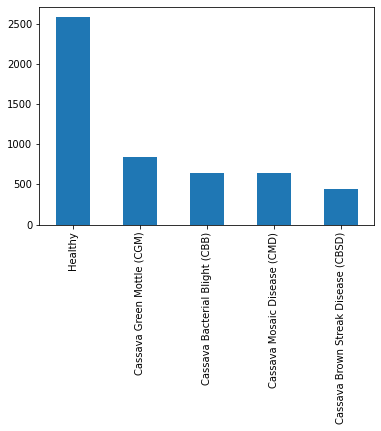

In [10]:
#remove if statement if you wanna remove the images.
# if(df.shape[0]<10000 and False)
    
remove_amounts = [x-2577//4 if x!=2577 else 0 for x in list(df.long_labels.value_counts())]
rm_dict = {0:remove_amounts[4],1:remove_amounts[2],2:remove_amounts[3],3:remove_amounts[0]}

df_pruned = df.copy() 
for i in [0,1,2,3]:
    frac = rm_dict[i]/df_pruned[df_pruned['label']==i].count()[0]
    print("removing ", df_pruned[df_pruned['label']==i].count()[0], numToLong(i))
    df_pruned = df_pruned.drop(df_pruned[df_pruned['label'] == i].sample(frac=frac).index)
df_pruned.long_labels.value_counts().plot.bar()

df_pruned.to_csv('train.csv',index=False)

df_remove_from_train_images = df[~df.isin(df_pruned)].dropna()

images_dir= "../../cassava-leaf-disease-classification/train_images/"
count = 0
#run this inside of train_images folder to actually delete the images.
for i in df_remove_from_train_images['image_id'].values:
    if os.path.exists(images_dir+i):
        os.remove(images_dir+i)
        count += 1
    else:
        print(i, "does not exist")

In [13]:
print(len(os.listdir(images_dir)), count)

5040 15841


## We are of the opinion that most of the images in the train dataset are in well-lit conditions that aren't realistic to every possible farmer's situation. 

We have decided to create an augmentation that randomizes the brightness setting of the images.

-0.5
-0.25
0.0
0.25
0.5


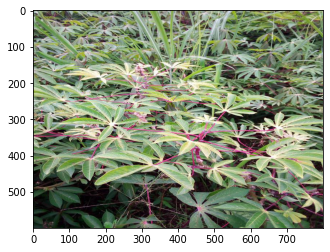

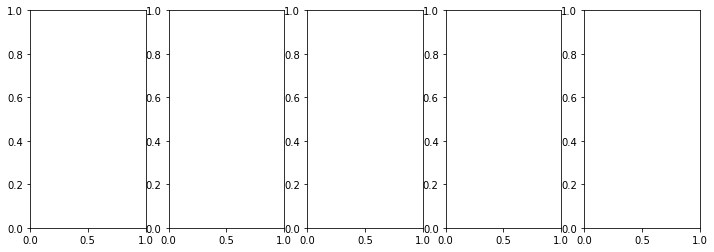

In [51]:
from PIL import Image, ImageEnhance


cas = "../cassava-leaf-disease-classification/test_images/2216849948.jpg"

plt.imshow(plt.imread("../cassava-leaf-disease-classification/test_images/2216849948.jpg"))
                
fig, axs = plt.subplots(1,5,figsize=(12,4))

enhancer = ImageEnhance.Brightness(im)
im.show()

for change, ax in zip(np.linspace(-0.5, 0.5,5), axs):
    im_output = enhancer.enhance(1+change)
    print(change)
    im_output.show( title=f'change={change:.2f}')

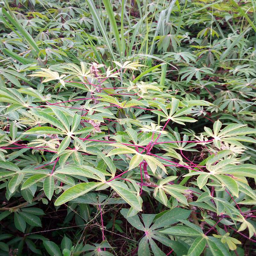

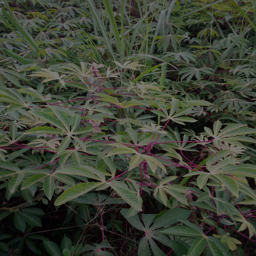

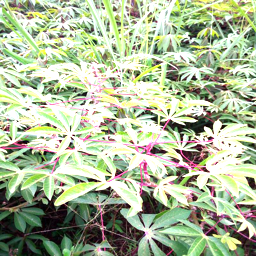

In [50]:
from IPython.display import display
from PIL import Image, ImageEnhance

#read the image
im = Image.open(cas).resize((256,256))

#image brightness enhancer
enhancer = ImageEnhance.Brightness(im)

factor = 1 #gives original image
im_output = enhancer.enhance(factor)
display(im_output)

factor = 0.5 #darkens the image
im_output = enhancer.enhance(factor)
display(im_output)

factor = 1.5 #brightens the image
im_output = enhancer.enhance(factor)
display(im_output)

-0.5
-0.25
0.0
0.25
0.5


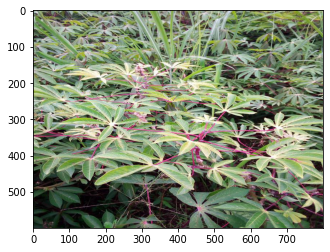

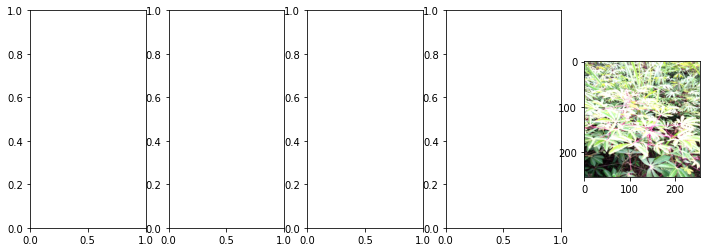

In [109]:
from PIL import Image, ImageEnhance
from IPython.display import display

cas = "../cassava-leaf-disease-classification/test_images/2216849948.jpg"
enhancer = ImageEnhance.Brightness(im)

im.show()

plt.imshow(plt.imread(cas))



                

fig, axs = plt.subplots(1,5,figsize=(12,4))



for change, ax in zip(np.linspace(-0.5, 0.5,5), axs):

    im_output = enhancer.enhance(1+change)
    print(change)
    factor+1
    plt.imshow(im_output)
    im_output.show(title=f'change={change:.2f}')
    
    





# Section 3: Data Modelling 
## In this section:
- image augmentation 
- step 1: data loaders set up 
- step 2: modelling and initial training 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
from sklearn.model_selection import StratifiedKFold
from joblib import load, dump
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from fastai import *
from fastai.vision import *
from fastai.vision.data import ImageDataLoaders
from fastai.vision.augment import aug_transforms
import fastai.callback.all
from torchvision import models as md
from efficientnet_pytorch import EfficientNet
from pathlib import Path
from torchvision.utils import make_grid
from sklearn.metrics import log_loss
import os
BS = 32
SZ = 224
images_dir= "../../cassava-leaf-disease-classification/train_images/"
df = pd.read_csv('./train.csv')

print(df.shape)
def file_exists(file):
    return os.path.exists(images_dir+file)

df['exists'] = df['image_id'].apply(lambda x: file_exists(x))
df=df[df['exists']]

def is_healthy(number):
    if number==4:
        return 1 #healthy
    else:
        return 0 #is_sick
df['is_healthy'] = df['label'].apply(lambda x: is_healthy(x))
df['is_healthy']

(5153, 3)


0       1
1       0
2       0
3       1
4       0
       ..
5148    0
5149    0
5150    0
5151    1
5152    1
Name: is_healthy, Length: 5040, dtype: int64

In [37]:
df.shape

(5040, 5)

In [20]:
df.columns[4]

'is_healthy'

In [2]:
tfms = aug_transforms(do_flip=True, 
                      flip_vert=True,
                      max_rotate=360,
                      max_zoom=False, 
                      max_lighting=0.1,
                      p_lighting=0.5,
                      xtra_tfms= None)

In [3]:
from sklearn.model_selection import StratifiedKFold

FOLD = 4

def strt_split(x, y, n_folds=5, random_seed = 42, path=Path('')):  
    try: 
        val_name = load('val_idx.joblib')
    except:
        skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_seed)
        val_name = [(val_idx, trn_idx) for trn_idx, val_idx in skf.split(x, y)]
        dump(val_name,'val_idx.joblib')
    return val_name

In [4]:
from fastai.vision.all import *
dls = ImageDataLoaders.from_df(df=df, path=Path(images_dir), cols='image', valid_pct=0.3, label_col=4, batch_tfms=Normalize.from_stats(*imagenet_stats), bs=BS, val_bs=16)
#         .label_from_df(cols='is_healthy', label_cls=FloatList)
#         .transform(tfms,size=SZ) #Data augmentation
#         .databunch(bs=BS)
#         .normalize(imagenet_stats)

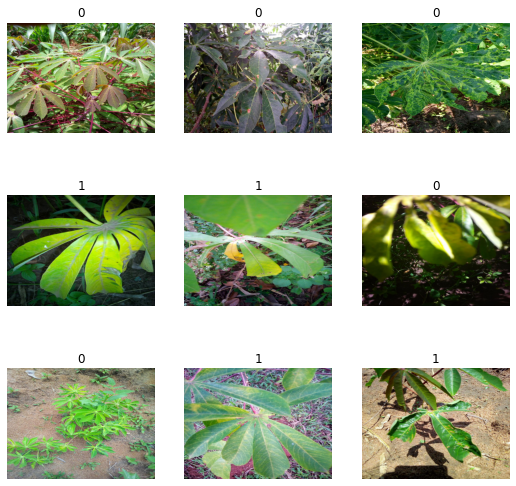

In [5]:
# data.classes
# data.show_batch(x=3, y=3, samples=)
# def show_images(images, nmax=64):
#     fig, ax = plt.subplots(figsize=(8, 8))
#     ax.set_xticks([]); ax.set_yticks([])
#     ax.imshow(make_grid((images.detach()[:nmax]), nrow=8).permute(1, 2, 0))
# def show_batch(dl, nmax=64):
#     for images in dl:
#         show_images(images, nmax)
#         break
# show_batch(data.train)
dls.train.show_batch()

In [14]:
from fastai.losses import CrossEntropyLossFlat
md_ef =  EfficientNet.from_pretrained('efficientnet-b4', num_classes=1)

learn = Learner(dls, md_ef, metrics = [log_loss], model_dir="models")
# learn.model = nn.DataParallel(learn.model)
learn.to_fp16()
learn.unfreeze()

Loaded pretrained weights for efficientnet-b4


In [12]:
lr = 5e-2

In [13]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate])

SuggestedLRs(lr_min=0.00043651582673192023, lr_steep=7.585775847473997e-07)

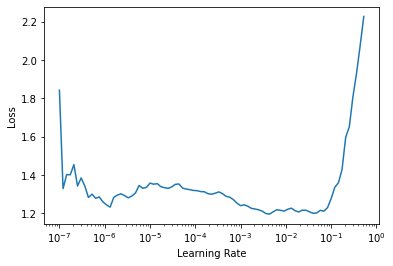

In [11]:
learn.lr_find()

In [14]:
learn.fit_one_cycle(5,
                    lr)

epoch,train_loss,valid_loss,error_rate,time
0,1.188586,3.707762,0.439153,00:54
1,0.785155,0.538563,0.246032,00:55
2,0.525980,0.459407,0.218915,00:54
3,0.439662,0.483969,0.216270,00:55
4,0.384943,0.466831,0.214947,00:54
